In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target  # Target variable

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [ ]:
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64


In [ ]:
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

<Axes: >

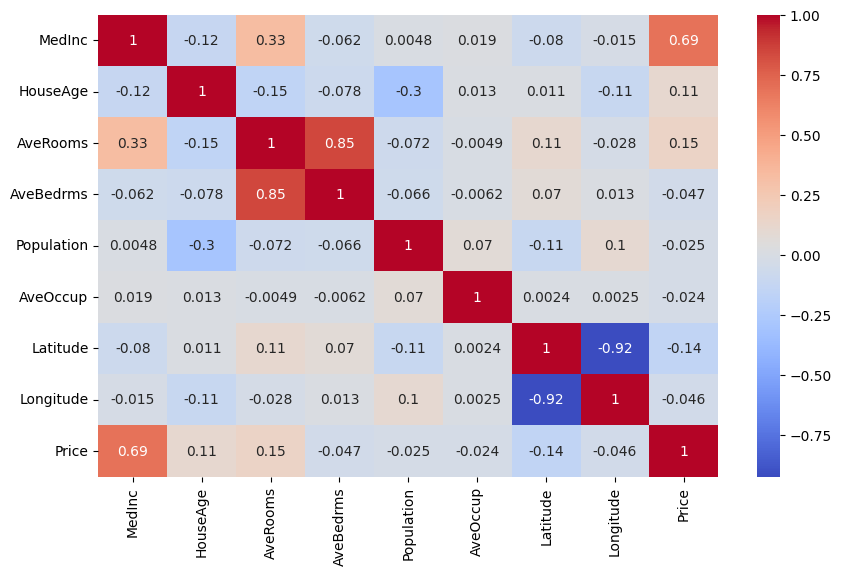

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [58]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(df.drop(columns=['Price']))
y=df['Price'].values

In [59]:
import numpy as np
x=df['MedInc'].values
y=df['Price'].values
x=(x-np.mean(x))/np.std(x)


In [60]:
split_ratio=0.8
split_index=int(len(x)*split_ratio)

x_train,x_test=x[:split_index],x[split_index:]
y_train,y_test=y[:split_index],y[split_index:]

In [61]:
def linear_regression(x,y,learning_rate=0.01,epochs=1000):
    w,b=0,0
    n=len(x)
    for epoch in range(epochs):
        dw,db=0,0

        for i in range(n):
            y_pred=w*x[i]+b
            error=y_pred-y[i]

            dw+=(2/n)*error*x[i]
            db+=(2/n)*error

        w-=learning_rate*dw
        b-=learning_rate*db

        if epoch%100==0:
            loss=sum((w*x[i]+b-y[i])**2 for i in range(n))/n
            print(f"epoch {epoch}: loss {loss}")
    return w,b

w_final,b_final=linear_regression(x,y,learning_rate=0.01,epochs=1000)
print(f"final params: w={w_final} , b={b_final}")


epoch 0: loss 5.416072857858947
epoch 100: loss 0.7840572932947129
epoch 200: loss 0.7025896508682856
epoch 300: loss 0.7011568023231951
epoch 400: loss 0.7011316014594864
epoch 500: loss 0.7011311582280434
epoch 600: loss 0.7011311504325185
epoch 700: loss 0.7011311502954033
epoch 800: loss 0.7011311502929912
epoch 900: loss 0.7011311502929531
final params: w=0.7939893876286417 , b=2.0685581656078305


In [62]:
def predict(x):
    return w_final*x+b_final

new_income = 3.5  # Median Income
predicted_price = predict(new_income)
print(f"Predicted Price for Median Income {new_income}: {predicted_price}")

Predicted Price for Median Income 3.5: 4.847521022308076


In [63]:
y_pred_test=[predict(x) for x in x_test]

mse=sum((y_test[i]-y_pred_test[i])**2 for i in range(len(y_test)))/len(y_test)
print(f"Mean Squared Error on Test Data: {mse:.4f}")

Mean Squared Error on Test Data: 0.6799
